In [25]:
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
import openpyxl
from netCDF4 import Dataset
import h5netcdf

In [26]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)


In [27]:
ds_grM

<xarray.Dataset> Size: 15MB
Dimensions:  (time: 1, x: 164, y: 116, level: 24, sector: 2, soil: 7)
Coordinates:
  * time     (time) datetime64[ns] 8B 2000-01-01
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
  * level    (level) float32 96B 0.02795 0.04996 0.08021 ... 0.9992 0.9996
  * sector   (sector) float32 8B 1.0 2.0
  * soil     (soil) float32 28B 1.0 2.0 3.0 4.0 5.0 6.0 7.0
Data variables: (12/40)
    DATE     (time) float32 4B ...
    LON      (y, x) float32 76kB ...
    LAT      (y, x) float32 76kB ...
    SH       (y, x) float32 76kB ...
    SOL      (y, x) float32 76kB ...
    TEX      (y, x) float32 76kB ...
    ...       ...
    ZZ       (time, level, y, x) float32 2MB ...
    SP       (time, y, x) float32 76kB ...
    ST       (time, y, x) float32 76kB ...
    SST      (time, y, x) float32 76kB ...
    SIC      (time, y, x) float32 76kB ...
    EWC      (time, y, x) float32 76kB ...
Attributes:
    title:        NESTOR output - Mod: MAR - Exp: GRa - 2000/01/01/00
    institution:  ULg (Xavier Fettweis)
    history:      libUN (2005.04.08) - Tue Jan  7 12:03:46 2025
    netcdf:       4.9.2 of Oct 15 2024 12:29:46 $

In [28]:
##GRf Fedchenko 5km; Gra Mera 5km
##sourceDataOLD='/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/'
#
sourceData='/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='daily-TT-MAR_ERA5-2003-2013.nc' ##change to monthly
dsM= xr.open_dataset('/bettik/amoryc/MARout/GRa/spin3_ICEmask/work/daily/daily-TT-MAR_ERA5-2003-2013.nc')['TT'][:,0,:,:] ## montlhy mean

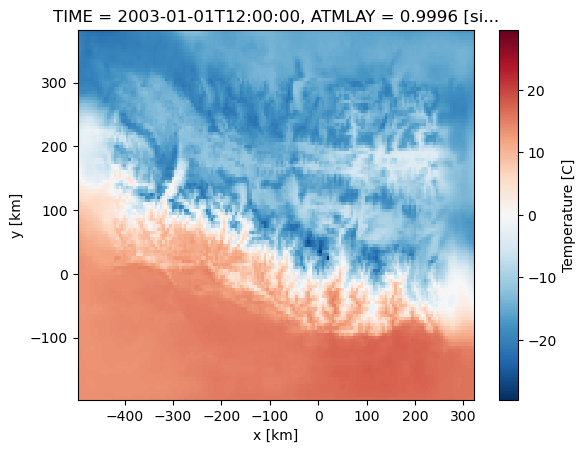

In [29]:
dsM[0,:,:].plot()

In [30]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
###
lon_MeraLa=86.900
lat_MeraLa=27.735
elev_MeraLa=5352.008

In [31]:
##Find the pixel of MAR corresponding to station
target_lon = lon_MeraLa
target_lat = lat_MeraLa

In [32]:
lon=ds_grM.LON
lat=ds_grM.LAT

In [33]:
lon

<xarray.DataArray 'LON' (y: 116, x: 164)> Size: 76kB
[19024 values with dtype=float32]
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
Attributes:
    units:          degrees
    long_name:      Longitude
    standard_name:  Longitude
    actual_range:   [81.71114  90.256714]
    valid_range:    [-1.e+20  1.e+20]

In [34]:
#len(lon),len(lat)

In [35]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.287968 , 5.240772 , 5.1936255, ..., 3.5945985, 3.6382864,
        3.6821296],
       [5.274055 , 5.2267156, 5.179424 , ..., 3.5731022, 3.6170528,
        3.6611905],
       [5.2604895, 5.2129927, 5.165556 , ..., 3.5520382, 3.5962706,
        3.640674 ],
       ...,
       [6.0885305, 6.0451493, 6.001897 , ..., 4.597399 , 4.633663 ,
        4.670207 ],
       [6.1141167, 6.0708904, 6.0278106, ..., 4.6302786, 4.666314 ,
        4.702625 ],
       [6.1399245, 6.0968695, 6.0539374, ..., 4.6633754, 4.6991653,
        4.735257 ]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0


40 99
<xarray.DataArray 'TT' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    TIME     datetime64[ns] 8B 2003-01-01T12:00:00
    X        float32 4B -295.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9996
Attributes:
    cell_methods:  TIME: mean
    history:       From ICE.a00.2003.01.01-31
    long_name:     Temperature
    units:         C


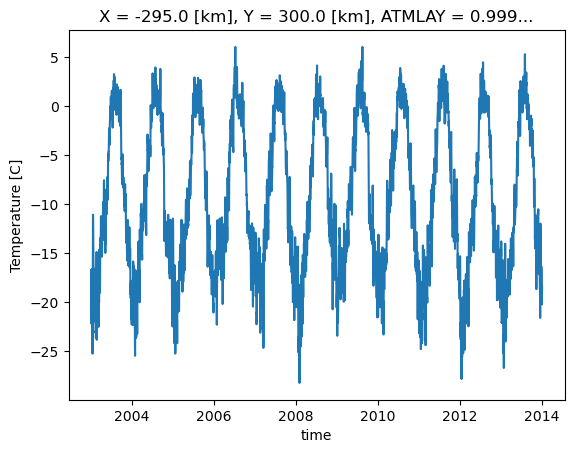

In [36]:
print(j,i) #x=i; y=j
print(dsM[0,i,j])
#dsM_sta=dsM[:, i, j]
dsM[:,i,j].plot()

In [37]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta=dsM[:, i, j]
dsM_sta_new= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
dsM_sta_new

<xarray.DataArray 'TT' (time: 4018)> Size: 16kB
[4018 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 32kB 2003-01-01T12:00:00 ... 2013-12-31T12...
    X        float32 4B -295.0
    Y        float32 4B 300.0
    ATMLAY   float32 4B 0.9996
Attributes:
    cell_methods:  TIME: mean
    history:       From ICE.a00.2003.01.01-31
    long_name:     Temperature
    units:         C

In [38]:
##Tip: Use xarray with .sel() 
#if your dataset already includes lat and lon coordinates (not just x/y):
##ds.sel(lat=target_lat, lon=target_lon, method='nearest')

In [39]:
#dsM_sta[0:3].TIME

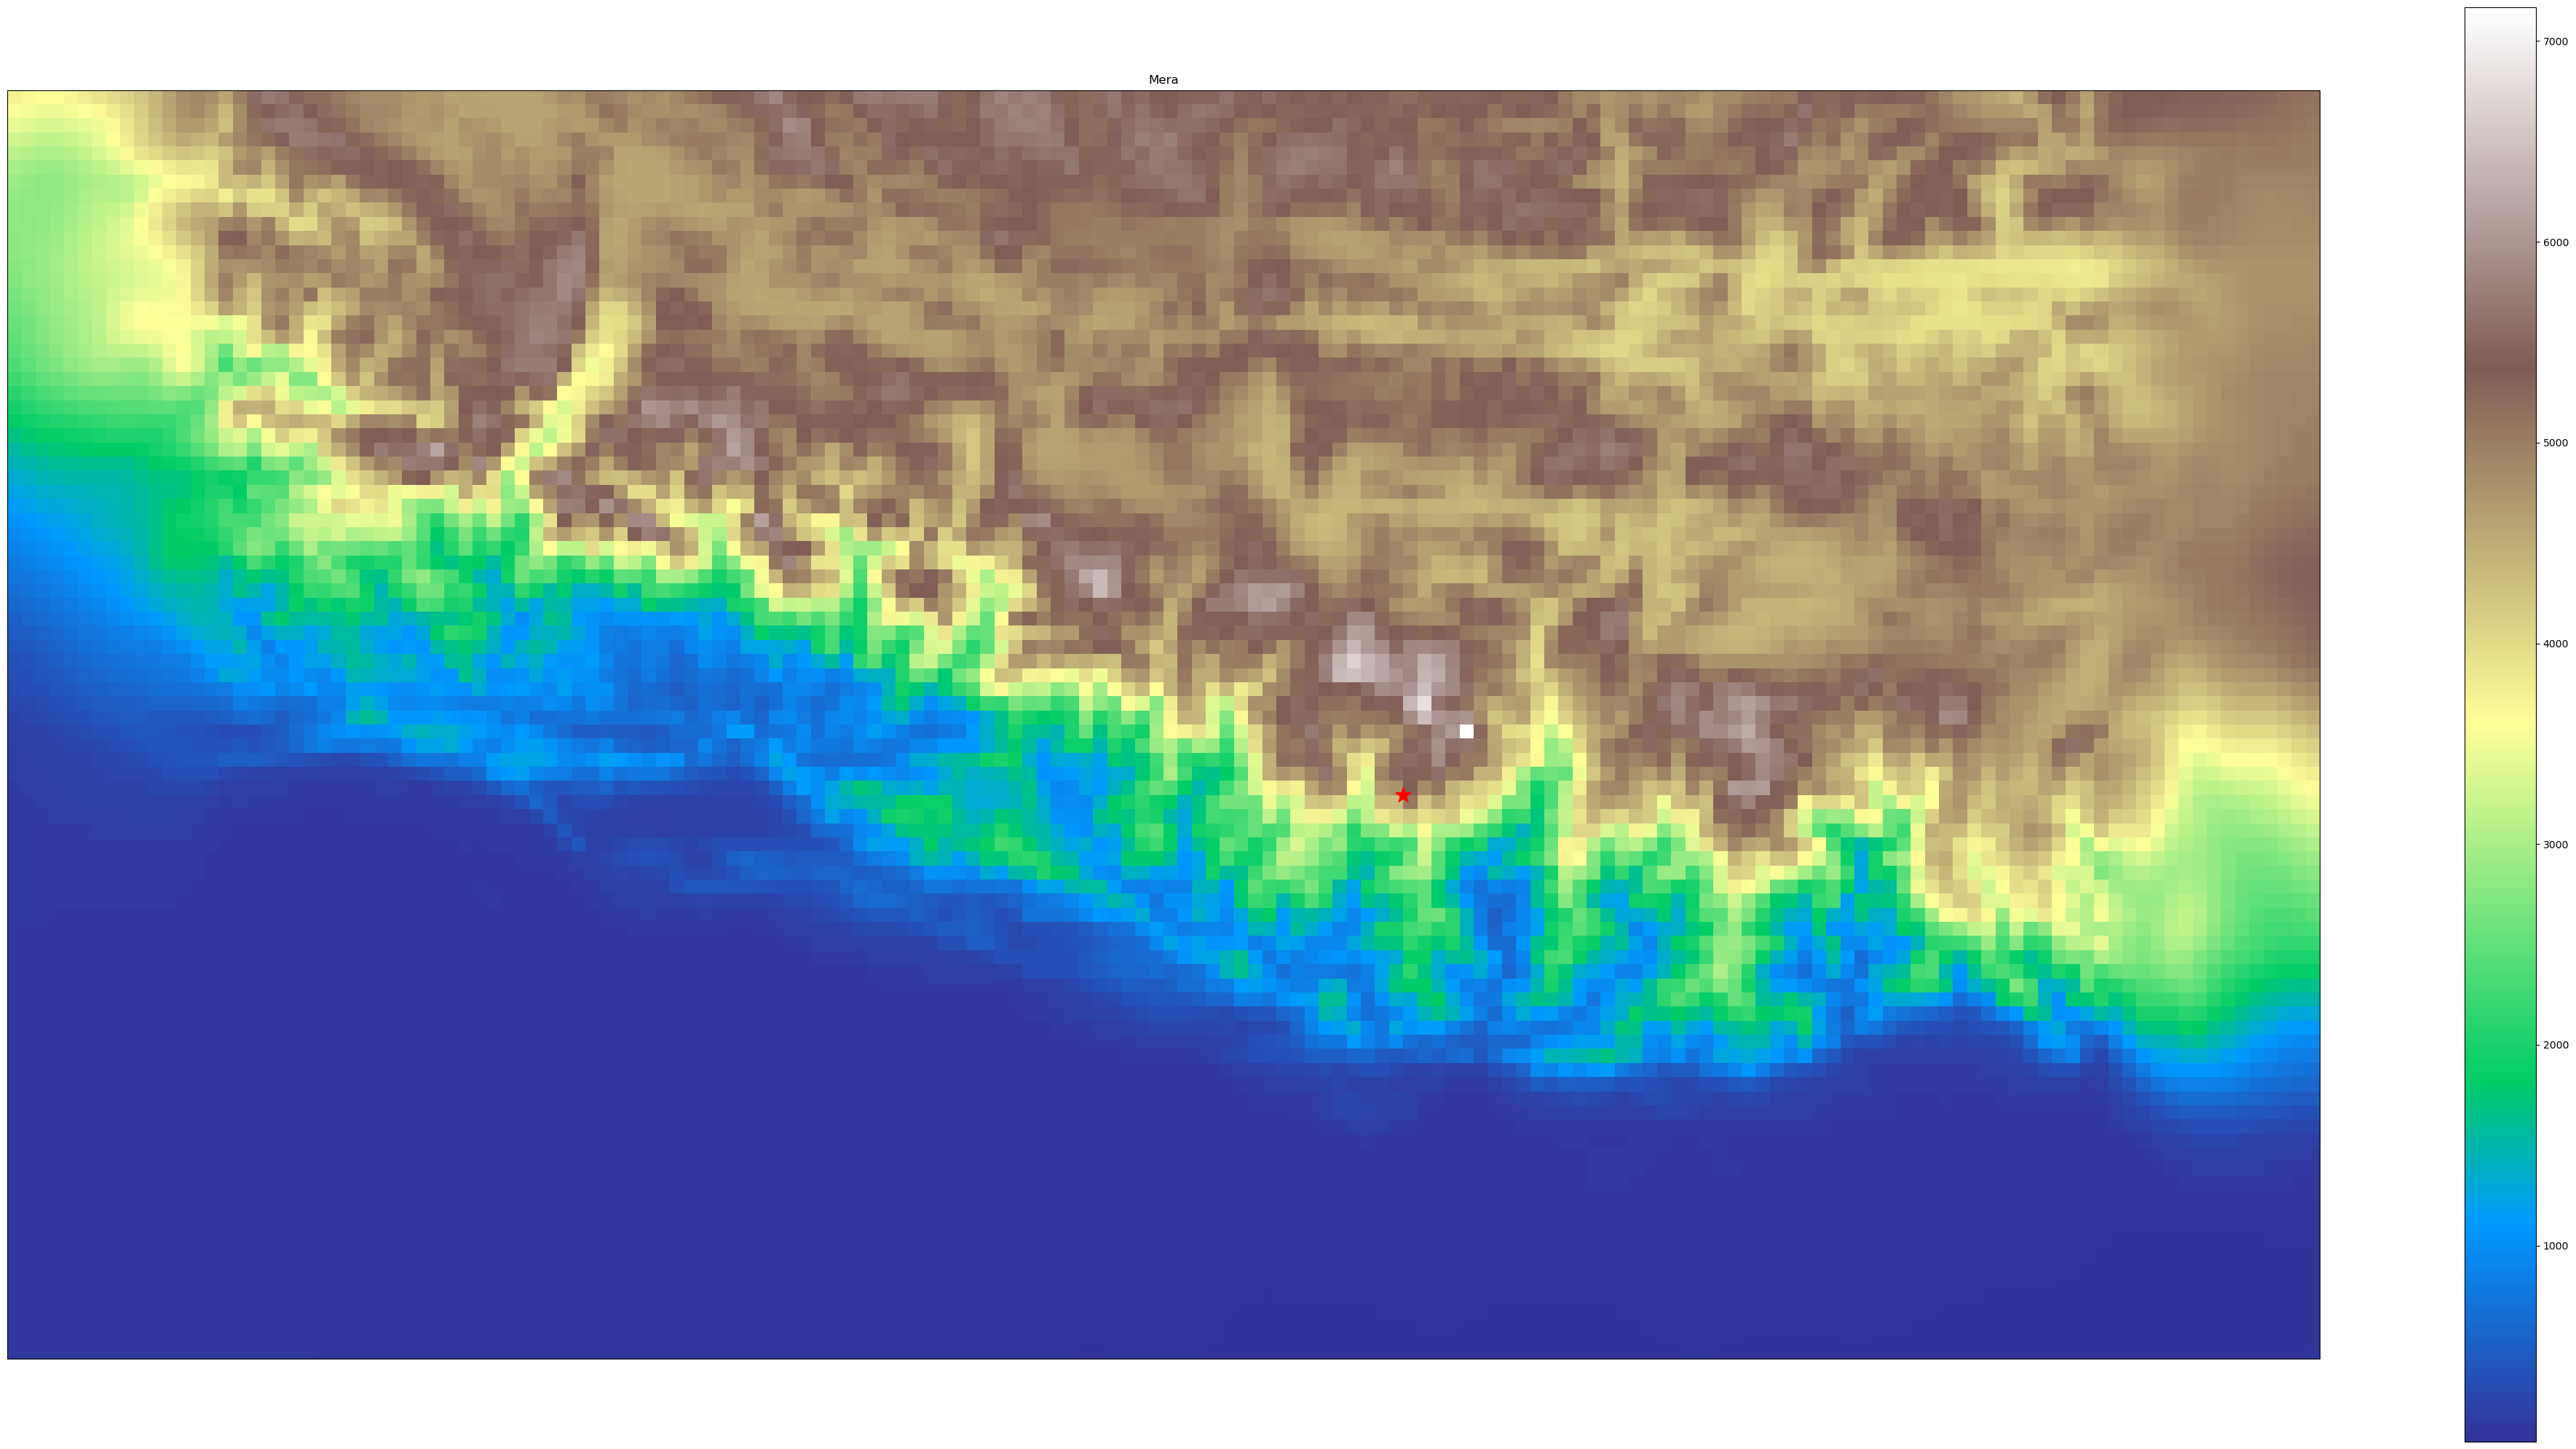

In [77]:
##
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(40,20))
cmap='terrain'

m1=axs.pcolormesh(ds_grM.SH,cmap=cmap)
axs.scatter(i,j,s=250,marker='*',color='red',linewidths=1.,edgecolors='red') #vérifier si coordonées sont dans le bon référenciel.

axs.set_title('Mera')
fig.colorbar(m1,orientation='vertical')

#ax1.set_title('contourf with levels')
fig.tight_layout()

plt.show()

In [41]:
####
## Opening station data
####

In [42]:
sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName='MeraLafinal2013_24.xlsx'
xl_file = pd.ExcelFile(sourceData+fileName)
print(xl_file)

In [43]:
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
DataMeraLa=dfs['MeraLa2013_23']

NameVars=['Time','Tair','RH','u','Direction','SWin','SWout','LWin','LWout','Patm']
UnitVars=['data/hour','C','%','m/s','degrees','W/m2','W/m2','W/m2','W/m2','hPa']

##Define new DataFrame and changing name of columns
dfile = pd.DataFrame(data=DataMeraLa.loc[4:])
df=pd.DataFrame(dfile.values, columns=NameVars)

### Opening one column + converting into an array
Tair_ar=[float(i) for i in df.Tair.values]


In [44]:
##In original time data from DataFrame, frequency is not defined so I cannot use the usual fonction (xr,pd)
##Need to redefine a time array + build a xarray of variable V=V(time)
def NewTime(
        NameVar,
        Var_ar,
        freq):
    start, end = df.Time.values[0], df.Time.values[-1]
    time = pd.date_range(start, end, freq=freq)
    ds = xr.Dataset({NameVar: ("time",np.asarray(Var_ar)), "time": time})
    return ds 
    
T=NewTime('Tair',Tair_ar,'30min')


In [45]:
daily_meanT=T.resample(time='D').mean()                          #Utilisation de la librairie xarray maintenant possible car les données ont une forme bien définie
monthly_meanT=daily_meanT.resample(time='ME').mean()             # chaque variable ici défini est un xarray.Dataset
yearly_meanT=monthly_meanT.resample(time='YE').mean()
#daily_meanTM

In [46]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name):  #monthly_meanTM.sel(time=monthly_meanTM['time'].dt.month.isin(seasons['MAM'])). Sélectionne dans le dataset les mois correspondants aux saisons définies au dessus

	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


In [47]:
#MAR comparison
#SH_MAR_sta=ds_grM.SH[j,i]
#print(SH_MAR_sta)
#print(elev_MeraLa)
#dif=elev_MeraLa-SH_MAR_sta.values
#print(dif)

In [49]:
# Get the time coordinates
time1 = daily_meanT['time']# début 2013-11-15 fin 2024-11-28
time2 = dsM_sta_new['time'] # début 2003-01-01T12: fin 2013-12-31T12
start=time1[0] 
end=time2[-1]

In [50]:
ts_sta=daily_meanT.sel(time=slice(start,end))
ts_MAR=dsM_sta_new.sel(time=slice(start,end))

In [56]:
ts_MARnew= ts_MAR.assign_coords(time=(ts_sta.time))

<Figure size 1000x600 with 0 Axes>

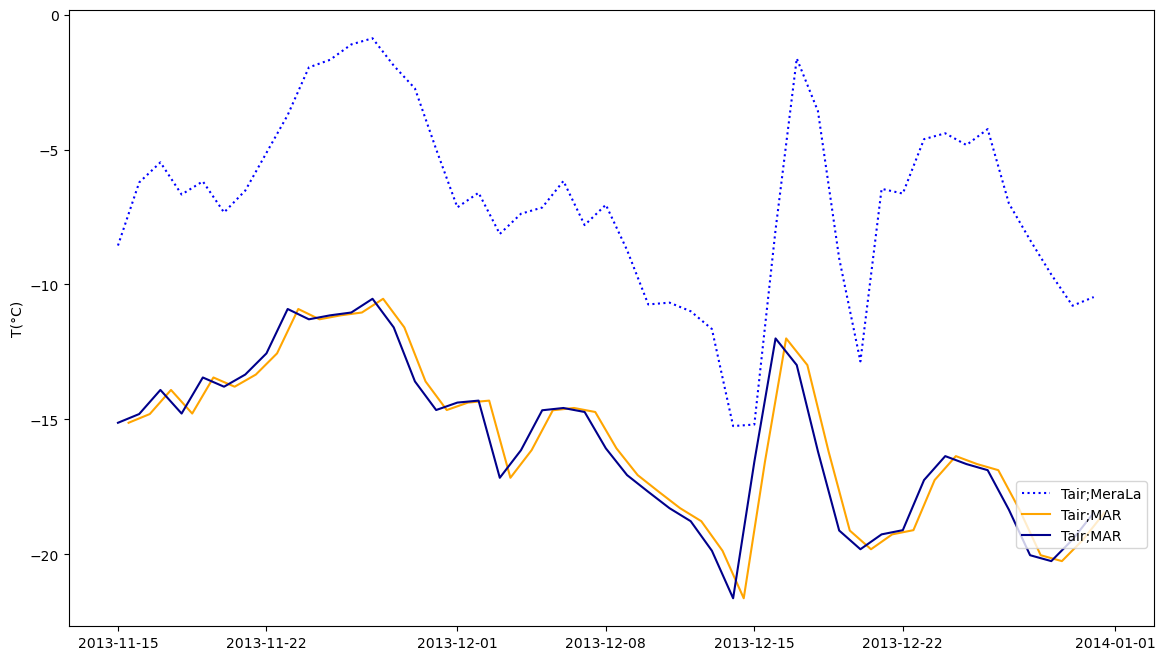

In [65]:
fig=plt.figure(figsize=(10,6))
## Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(14,8))

plt.plot(ts_sta.time,ts_sta['Tair'].values,
         color='blue',linestyle=':',label='Tair;'+'MeraLa')
plt.plot(ts_MAR.time,ts_MAR.values,
         color='orange',label='Tair;'+'MAR')
plt.plot(ts_MARnew.time,ts_MARnew.values,
         color='darkblue',label='Tair;'+'MAR')

ax1.set_ylabel('T(°C)')
#ax1.set_ylim(5, 7)
fig.legend(bbox_to_anchor=(0.4, -0.2, 0.5, 0.5)) #bbox (x, y, width, height) 


<Figure size 1000x600 with 0 Axes>

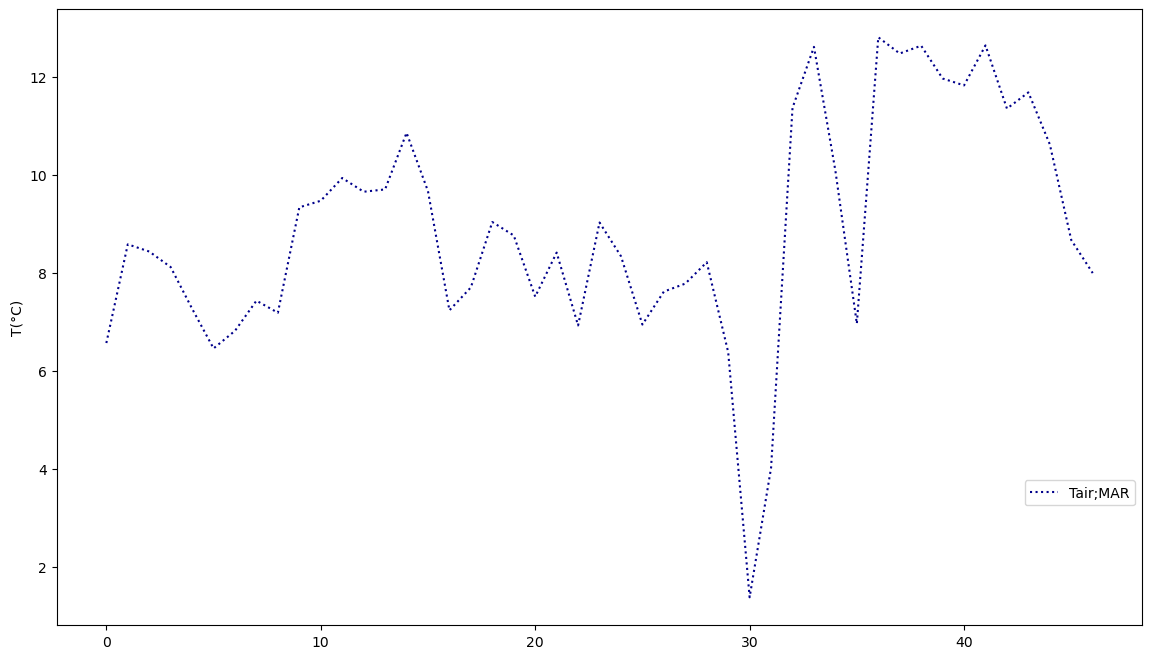

In [62]:
fig=plt.figure(figsize=(10,6))
## Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(14,8))

plt.plot(ts_sta['Tair'].values -ts_MAR.values,
         color='darkblue',linestyle=':',label='Tair;'+'MAR')
ax1.set_ylabel('T(°C)')
#ax1.set_ylim(5, 7)
fig.legend(bbox_to_anchor=(0.4, -0.2, 0.5, 0.5)) #bbox (x, y, width, height) 


#MAR saisonier
ts_MAR_premon = seasonsdata(ts_MAR, 'MAM').resample(time='D').mean()

ts_MAR_mon = seasonsdata(ts_MAR, 'JJAS').resample(time='D').mean()

ts_MAR_postmon = seasonsdata(ts_MAR, 'ON').resample(time='D').mean()

ts_MAR_hiver = seasonsdata(ts_MAR, 'DJF').resample(time='D').mean()

ts_MAR_hiver


In [74]:
#Tglacio saisonier
T_premon = seasonsdata(daily_meanT, 'MAM') .resample(time='D').mean()

T_mon = seasonsdata(daily_meanT, 'JJAS').resample(time='D').mean()

T_postmon =  seasonsdata(daily_meanT, 'ON').resample(time='D').mean()

T_hiver  = seasonsdata(daily_meanT, 'DJF').resample(time='D').mean()


In [75]:
ts_sta_premon=T_premon.sel(time=slice(start,end))
ts_sta_mon=T_mon.sel(time=slice(start,end))
ts_sta_postmon=T_postmon.sel(time=slice(start,end))
ts_sta_hiver=T_hiver.sel(time=slice(start,end))


In [76]:
SH_sta=[elev_MeraLa]
value = ds_grM['SH'].isel(y=j, x=i)
diff=SH_sta-value.values
diff[0]

np.float64(16.68622265624981)